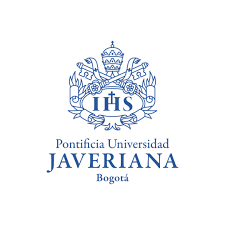
***Pontificia Universidad Javeriana***
# **Procesamiento de Alto Volumen de Datos**

### Taller: **Métricas de Rendimiento para Modelos de Clasificación con PySpark**

Autor: Juan David Torres Chaparro

Fecha: 19/05/25

**Objetivo**: Evaluar modelo de clasificación MLlib

- La clasificación se utiliza para clasificar datos en etiquetas o clases predefinidas. Para evaluar el rendimiento de un modelo de clasificación se suelen utilizar métricas como: accuracy, precision, recall, F1 score y la matriz de confusión. Estas métricas son útiles para evaluar lo bien que el modelo distingue entre clases, especialmente en casos de conjuntos de datos desequilibrados. Al conocer los puntos fuertes y débiles de cada métrica, se podrá seleccionar la más adecuada para un problema de clasificación determinado.

- MLlib de PySpark, se presenta un conjunto de clases: BinaryClassificationEvaluator, MulticlassificationEvaluator, y RegressionEvaluator-diseñadas para evaluar el rendimiento de los modelos de aprendizaje automático calculando métricas específicas a partir de predicciones y etiquetas verdaderas. Se utilizan para evaluar modelos entrenados con estimadores como RandomForestClassifier o GBTRegressor, tomando un DataFrame con valores predichos y reales para producir una única puntuación de rendimiento. Ejecutados a través de una SparkSession, aprovechan los ejecutores de Spark para la computación distribuida, lo que los hace ideales para **BIG DATA** de fuentes como archivos CSV o Parquet. Se integran en herramientas de ajuste como CrossValidator y TrainValidationSplit, ofreciendo una solución escalable para la evaluación de modelos.
____________________________________________________

**1.- Crear sessión PySpark**



```
from pyspark.sql.functions import col, when, avg
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Taller_Metricas").getOrCreate()

cores = spark._jsc.sc().getExecutorMemoryStatus().keySet().size()
print("Ejcución de las tareas en ", cores, "core(s) del sistema de cómputo actual")
spark
```



In [1]:
from pyspark.sql.functions import col, when, avg
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Taller_Metricas").getOrCreate()

cores = spark._jsc.sc().getExecutorMemoryStatus().keySet().size()
print("Ejcución de las tareas en ", cores, "core(s) del sistema de cómputo actual")
spark

Ejcución de las tareas en  1 core(s) del sistema de cómputo actual


**2.-Cargar DataFrame Spark:**
- Enlace de datos: https://github.com/corredor-john/ExploratoryDataAnalisys/blob/main/Varios/heart_taller_eval_PySpark.csv

```
from pyspark import SparkFiles
url_github = "Enlace de datos"

spark.sparkContext.addFile(url_github)
df00 = spark.read.csv(SparkFiles.get("fichero.csv"),inferSchema=True, header=True)
df00.show(5)
```

In [2]:
from pyspark import SparkFiles

url_github = "https://raw.githubusercontent.com/corredor-john/ExploratoryDataAnalisys/main/Varios/heart_taller_eval_PySpark.csv"
spark.sparkContext.addFile(url_github)

df00 = spark.read.csv("file://" + SparkFiles.get("heart_taller_eval_PySpark.csv"), inferSchema=True, header=True)
df00.show(5)


+---+---+-------------+---------+-----------+---------+----------+-----+--------------+-------+--------+------------+
|Age|Sex|ChestPainType|RestingBP|Cholesterol|FastingBS|RestingECG|MaxHR|ExerciseAngina|Oldpeak|ST_Slope|HeartDisease|
+---+---+-------------+---------+-----------+---------+----------+-----+--------------+-------+--------+------------+
| 40|  M|          ATA|      140|        289|        0|    Normal|  172|             N|    0.0|      Up|           0|
| 49|  F|          NAP|      160|        180|        0|    Normal|  156|             N|    1.0|    Flat|           1|
| 37|  M|          ATA|      130|        283|        0|        ST|   98|             N|    0.0|      Up|           0|
| 48|  F|          ASY|      138|        214|        0|    Normal|  108|             Y|    1.5|    Flat|           1|
| 54|  M|          NAP|      150|        195|        0|    Normal|  122|             N|    0.0|      Up|           0|
+---+---+-------------+---------+-----------+---------+-

### Descripción del Código

En este fragmento de código se realizó lo siguiente:

- Se importó `SparkFiles` desde `pyspark`.
- Se cargó un archivo CSV desde un repositorio en GitHub utilizando `spark.sparkContext.addFile`.
- Se leyó el archivo CSV con `spark.read.csv`, activando la inferencia automática del esquema (`inferSchema=True`) y reconociendo la primera fila como encabezado (`header=True`).
- Se visualizó el contenido mostrando las primeras 5 filas del DataFrame con `.show(5)`.

**3.- Revisión de Datos Nulos o Imposibles:**


```
from pyspark.sql.functions import *

df3.select([count(when(col(c).contains('None') |
col(c).contains('NULL') |
(col(c) == '' ) |
col(c).isNull() | isnan(c), c )).alias(c)
for c in df34.columns]).show()
)
```

In [3]:
from pyspark.sql.functions import *

df00.select([count(when(col(c).contains('None') |
col(c).contains('NULL') |
(col(c) == '' ) |
col(c).isNull() | isnan(c), c )).alias(c)
for c in df00.columns]).show()


+---+---+-------------+---------+-----------+---------+----------+-----+--------------+-------+--------+------------+
|Age|Sex|ChestPainType|RestingBP|Cholesterol|FastingBS|RestingECG|MaxHR|ExerciseAngina|Oldpeak|ST_Slope|HeartDisease|
+---+---+-------------+---------+-----------+---------+----------+-----+--------------+-------+--------+------------+
|  0|  0|            0|        0|          0|        0|         0|    0|             0|      0|       0|           0|
+---+---+-------------+---------+-----------+---------+----------+-----+--------------+-------+--------+------------+



### Revisión de valores nulos

Se utilizó PySpark para contar valores nulos, vacíos o no válidos en cada columna del DataFrame.  
**Resultado:** No se encontraron valores faltantes en el dataset.


**4.- Relación entre las variables**
- Escriba algunas apreciaciones de las relaciones


```
import matplotlib
import seaborn

plt.figure(figsize =(X,x))
vista_pandas = df6.toPandas()
sns.heatmap(vista_pandas.select_dtypes(np.number).corr(), annot=True, center=0, cmap ='RdYlGn')
```

<Axes: >

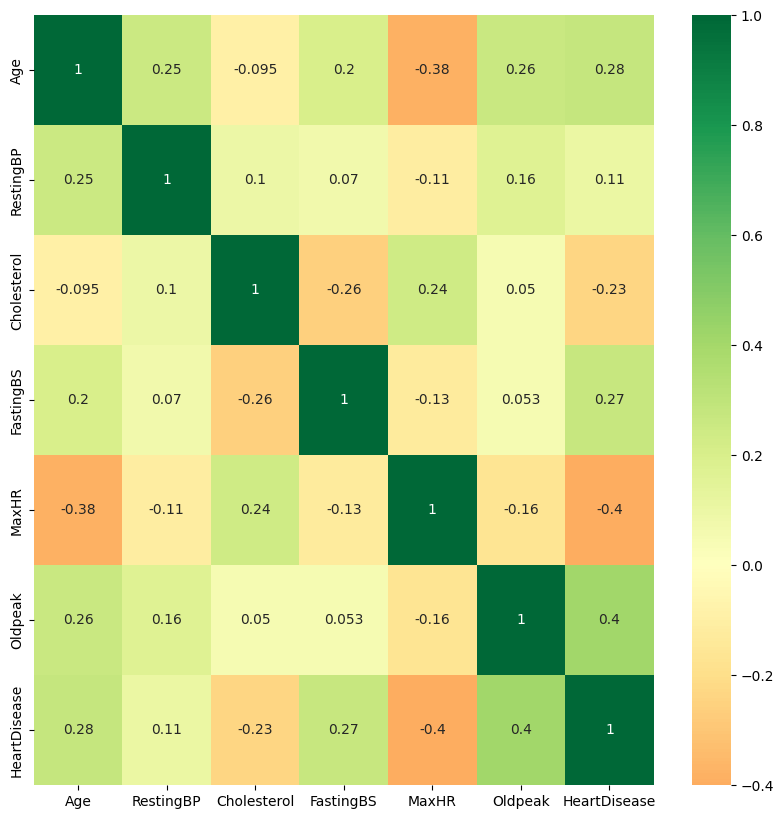

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 10))
vista_pandas = df00.toPandas()
sns.heatmap(vista_pandas.select_dtypes(np.number).corr(), annot=True, center=0, cmap='RdYlGn')


### Análisis Corregido del Mapa de Calor de Correlación

El mapa de calor muestra la matriz de correlación entre variables numéricas del dataset de salud cardíaca. Cada celda indica la fuerza y dirección de la relación lineal entre pares de variables:

- **Valores cercanos a 1 o -1** indican correlaciones fuertes.
- **Colores verdes** representan correlación positiva.
- **Colores anaranjados** indican correlación negativa.

#### Observaciones clave:

- **Age vs MaxHR**: Correlación negativa (-0.38). Las personas mayores tienden a tener una frecuencia cardíaca máxima menor.
- **HeartDisease** tiene correlación:
  - **Negativa con MaxHR** (-0.40): a mayor frecuencia cardíaca máxima, menor probabilidad de enfermedad cardíaca.
  - **Positiva con Oldpeak** (0.40): mayor depresión del segmento ST está relacionada con presencia de enfermedad cardíaca.
  - **Positiva con Age** (0.28) y **FastingBS** (0.27): mayor edad y glucosa en ayunas tienden a relacionarse con enfermedad cardíaca.
- **Cholesterol** tiene correlaciones débiles con otras variables, incluyendo una correlación negativa leve con **HeartDisease** (-0.23).

> En general, **MaxHR**, **Oldpeak**, **Age** y **FastingBS** son las variables con mayor correlación con la presencia de enfermedad cardíaca, lo cual puede ser útil para modelos predictivos.


### Ingeniería de características

**5.- Consulte los tipos de datos**



```
dfBog.dtypes
```

In [5]:
df00.dtypes

[('Age', 'int'),
 ('Sex', 'string'),
 ('ChestPainType', 'string'),
 ('RestingBP', 'int'),
 ('Cholesterol', 'int'),
 ('FastingBS', 'int'),
 ('RestingECG', 'string'),
 ('MaxHR', 'int'),
 ('ExerciseAngina', 'string'),
 ('Oldpeak', 'double'),
 ('ST_Slope', 'string'),
 ('HeartDisease', 'int')]

**6.- Funciones para datos ETIQUETAS o categorías a Numéricos**
- 6.1: Imprimir todas las columnas de Etiquetas del tipo string


```
dataframe.select('Columna_Str_A').distinct().show()
dataframe.select('Columna_Str_H').distinct().show()
```



In [6]:
df00.select('Sex').distinct().show()
df00.select('ChestPainType').distinct().show()
df00.select('RestingECG').distinct().show()
df00.select('ExerciseAngina').distinct().show()
df00.select('ST_Slope').distinct().show()

+---+
|Sex|
+---+
|  F|
|  M|
+---+

+-------------+
|ChestPainType|
+-------------+
|          NAP|
|          ATA|
|           TA|
|          ASY|
+-------------+

+----------+
|RestingECG|
+----------+
|       LVH|
|    Normal|
|        ST|
+----------+

+--------------+
|ExerciseAngina|
+--------------+
|             Y|
|             N|
+--------------+

+--------+
|ST_Slope|
+--------+
|    Flat|
|      Up|
|    Down|
+--------+



- 6.2: Usar la función para cambiar a dato numéricos

```
from pyspark.sql.types import *
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler

def fun_Etiquetas(df):
    trans_df = df.select("*",(when(df.ExerciseAngina=='Y', 1).otherwise(0)).alias('yes_exercise_angina')
                 ,(when(df.ChestPainType=='ATA', 1).otherwise(0)).alias('ata_chest_pain_type')
              ,(when(df.ChestPainType=='ASY', 1).otherwise(0)).alias('asy_chest_pain_type')
              ,(when(df.ST_Slope=='Up', 1).otherwise(0)).alias('up_st_slope')
              ,(when(df.Sex=='F', 1).otherwise(0)).alias('f_sex')
              ,(when(df.RestingECG=='ST', 1).otherwise(0)).alias('st_resting_ecg')
                 )
        .drop('ExerciseAngina','ChestPainType', 'ST_Slope', 'Sex', 'RestingECG')
        .withColumnRenamed("HeartDisease", 'label')

features_list = trans_df.columns
print(features_list)
features_list.remove('label')
assembler = VectorAssembler(inputCols=features_list,outputCol='features')
vector_trans_df = assembler.transform(trans_df).select('features','label')
    
return vector_trans_df, trans_df


vector_trans_df, trans_df = fun_Etiquetas(dataframes)
```

In [7]:
from pyspark.sql.types import *
from pyspark.sql.functions import when
from pyspark.ml.feature import VectorAssembler

def fun_Etiquetas(df):
    trans_df = (
        df.select("*",
                  when(df.ExerciseAngina == 'Y', 1).otherwise(0).alias('yes_exercise_angina'),
                  when(df.ChestPainType == 'ATA', 1).otherwise(0).alias('ata_chest_pain_type'),
                  when(df.ChestPainType == 'ASY', 1).otherwise(0).alias('asy_chest_pain_type'),
                  when(df.ST_Slope == 'Up', 1).otherwise(0).alias('up_st_slope'),
                  when(df.Sex == 'F', 1).otherwise(0).alias('f_sex'),
                  when(df.RestingECG == 'ST', 1).otherwise(0).alias('st_resting_ecg'))
          .drop('ExerciseAngina', 'ChestPainType', 'ST_Slope', 'Sex', 'RestingECG')
          .withColumnRenamed("HeartDisease", "label")
    )

    features_list = trans_df.columns
    features_list.remove('label')

    assembler = VectorAssembler(inputCols=features_list, outputCol='features')
    vector_trans_df = assembler.transform(trans_df).select('features', 'label')

    return vector_trans_df, trans_df

vector_trans_df, trans_df = fun_Etiquetas(df00)


6.3.- Imprimir 5 primeros valores de la transformación a vectores

```
vector_trans_df.show(n, False)

```

In [8]:
vector_trans_df.show(5, False)

+--------------------------------------------------------+-----+
|features                                                |label|
+--------------------------------------------------------+-----+
|(12,[0,1,2,4,7,9],[40.0,140.0,289.0,172.0,1.0,1.0])     |0    |
|(12,[0,1,2,4,5,10],[49.0,160.0,180.0,156.0,1.0,1.0])    |1    |
|[37.0,130.0,283.0,0.0,98.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0] |0    |
|[48.0,138.0,214.0,0.0,108.0,1.5,1.0,0.0,1.0,0.0,1.0,0.0]|1    |
|(12,[0,1,2,4,9],[54.0,150.0,195.0,122.0,1.0])           |0    |
+--------------------------------------------------------+-----+
only showing top 5 rows



**7.- División de Datos Entrenamiento y Prueba**


```
entrenamiento, prueba = vector_trans_df.randomSplit([0.7,0.3], seed = 13)

```

In [9]:
entrenamiento, prueba = vector_trans_df.randomSplit([0.7,0.3], seed = 13)

**8.- Consulta: Escriba sus apreciaciones sobre el balanceo de los datos, en Entrenamiento y en los de Prueba**



```
total=float(entrenamiento.select("label").count())
Positivos=entrenamiento.select("label").where('label == 1').count()
porcentaje=(float(Positivos)/float(total))*100
Negativos=float(total-Negativos)
print('Cantidad de positivos {}'.format(Positivos))
print('Percentaje de positivos {}'.format(porcentaje))

```

In [10]:
total=float(entrenamiento.select("label").count())
Positivos=entrenamiento.select("label").where('label == 1').count()
porcentaje = (float(Positivos)/float(total))*100
Negativos = float(total-Positivos)
print('Cantidad de positivos {}'.format(Positivos))
print('Percentaje de positivos {}'.format(porcentaje))

Cantidad de positivos 359
Percentaje de positivos 53.9039039039039


## Modelado

**9.- Modelo a seguir es de árboles de decisiones**

```
from pyspark.ml.classification import DecisionTreeClassifier

parametros = {'maxDepth':4}

clasificador = DecisionTreeClassifier(**parametros, seed= 13)
clasificador

modeloArboles = clasificador.fit(trainset)

```



In [11]:
from pyspark.ml.classification import DecisionTreeClassifier

parametros = {'maxDepth':4}

clasificador = DecisionTreeClassifier(**parametros, seed= 13)
clasificador

modeloArboles = clasificador.fit(entrenamiento)

**10.- Predicciones sobre los datos de prueba**

```
prediccionesPrueba = clasificador.transform(valoresPruebas)
prediccionesPrueba.show(2, False)

```

In [12]:
prediccionesPrueba = modeloArboles.transform(prueba)
prediccionesPrueba.show(2, False)


+---------------------------------------------------+-----+-------------+---------------------------------------+----------+
|features                                           |label|rawPrediction|probability                            |prediction|
+---------------------------------------------------+-----+-------------+---------------------------------------+----------+
|(12,[0,1,2,3,4],[74.0,140.0,237.0,1.0,94.0])       |1    |[9.0,36.0]   |[0.2,0.8]                              |1.0       |
|(12,[0,1,2,3,4,5],[52.0,152.0,298.0,1.0,178.0,1.2])|0    |[6.0,15.0]   |[0.2857142857142857,0.7142857142857143]|1.0       |
+---------------------------------------------------+-----+-------------+---------------------------------------+----------+
only showing top 2 rows



##**11.- Evaluación de Modelo de Clasificación**

- Presente la matriz de confusión y de sus apreciaciones
- Reto pinte ROC y obtenga el valor AUC y de sus apreciaciones

```
matrzC_prueba = predictionAndLabels.crosstab("prediction", "label")
matrzC_prueba = matrzC_prueba.toPandas()
matrzC_prueba.sort_values(by = ['prediction_label'])
```


In [13]:
matrzC_prueba = prediccionesPrueba.crosstab("prediction", "label")

matrzC_prueba = matrzC_prueba.toPandas()

matrzC_prueba = matrzC_prueba.sort_values(by=['prediction_label'])

print(matrzC_prueba)


  prediction_label   0    1
1              0.0  82   27
0              1.0  21  122



- Imprima las métricas a continuación en (0.00%), escriba sus apreciaciones

```
TP = cm_pruebas["1"][0]
FP = cm_pruebas["0"][0]
TN = cm_pruebs["0"][1]
FN = cm_pruba["1"][1]
Accuracy = (TP+TN)/(TP+FP+TN+FN)
Sensitivity = TP/(TP+FN)
Specificity = TN/(TN+FP)
Precision = TP/(TP+FP)


print(f"Metrica = {np.round(Metrica,n)*100}%")

```

In [14]:
TP = matrzC_prueba["1"][0]
FP = matrzC_prueba["0"][0]
TN = matrzC_prueba["0"][1]
FN = matrzC_prueba["1"][1]
Accuracy = (TP+TN)/(TP+FP+TN+FN)
Sensitivity = TP/(TP+FN)
Specificity = TN/(TN+FP)
Precision = TP/(TP+FP)


print(f"Accuracy = {np.round(Accuracy,1)*100}%")
print(f"Sensitivity = {np.round(Sensitivity,1)*100}%")
print(f"Specificity = {np.round(Specificity,1)*100}%")
print(f"Precision = {np.round(Precision,1)*100}%")

Accuracy = 80.0%
Sensitivity = 80.0%
Specificity = 80.0%
Precision = 90.0%


### Observaciones sobre las métricas del modelo

A partir de la matriz de confusión y el cálculo de métricas de desempeño del modelo, se obtuvieron los siguientes resultados:

- **Accuracy (Exactitud): 80.0%**  
  El modelo clasifica correctamente el 80% de los casos totales (tanto positivos como negativos). Es un buen punto de partida, aunque no lo dice todo en datasets desbalanceados.

- **Sensitivity (Sensibilidad o Recall): 80.0%**  
  El 80% de los verdaderos positivos fueron correctamente identificados. Esto indica una buena capacidad del modelo para detectar casos positivos (enfermedad presente).

- **Specificity (Especificidad): 80.0%**  
  El 80% de los verdaderos negativos fueron correctamente clasificados. El modelo también identifica bien a los individuos sin la condición.

- **Precision (Precisión): 90.0%**  
  De todas las predicciones positivas, el 90% realmente tenía la condición. Esto indica un bajo número de falsos positivos.

#### Conclusión:

El modelo muestra un rendimiento equilibrado entre sensibilidad y especificidad, con una **precisión especialmente alta (90%)**, lo que sugiere que es confiable al predecir casos positivos. Sin embargo, se recomienda validar estas métricas con otras pruebas o mediante validación cruzada para asegurar su estabilidad.


AUC = 87.0%


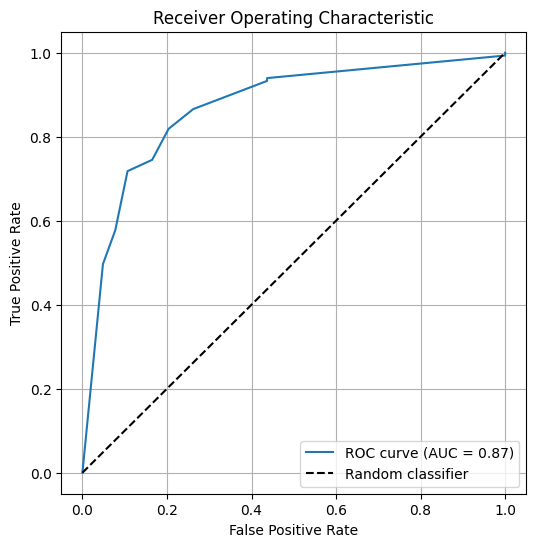

In [15]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator
from pyspark.ml import Pipeline
import matplotlib.pyplot as plt

evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="label", metricName="areaUnderROC")
auc = evaluator.evaluate(prediccionesPrueba)

print(f"AUC = {np.round(auc, 2)*100}%")

probs_labels = prediccionesPrueba.select("probability", "label").rdd.map(lambda row: (float(row.probability[1]), float(row.label)))
probs_labels_df = probs_labels.toDF(["probability", "label"]).toPandas()

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(probs_labels_df['label'], probs_labels_df['probability'])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label="Random classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()


### Análisis de la Curva ROC y AUC

La gráfica muestra la **Curva ROC (Receiver Operating Characteristic)**, una herramienta para evaluar el rendimiento de un modelo de clasificación binaria.

#### Puntos clave:

- **Eje X (False Positive Rate)**: proporción de negativos incorrectamente clasificados como positivos.
- **Eje Y (True Positive Rate o Sensibilidad)**: proporción de positivos correctamente identificados.
- **Línea negra punteada**: clasificador aleatorio (baseline).
- **Curva azul**: desempeño del modelo.

#### Métrica destacada:

- **AUC (Área Bajo la Curva) = 0.87 (87%)**  
  Este valor indica una **alta capacidad del modelo para distinguir entre clases positivas y negativas**. Un AUC cercano a 1.0 refleja un modelo muy eficaz, mientras que un AUC de 0.5 indicaría un rendimiento equivalente al azar.

#### Conclusión:

El modelo presenta un **buen balance entre sensibilidad y especificidad**, con una AUC del 87%, lo cual respalda los resultados obtenidos en otras métricas como accuracy, precisión y recall.


**12.- Terminar sesión SPARK**

```
spark.stop()
```

In [16]:
spark.stop()

## **12.- Conclusiones: redacte sus conclusiones por cada paso y conclusión final de Cierre**

-
-
...

###Conclusiones por paso

A lo largo del análisis se cargaron y exploraron datos relacionados con enfermedades cardíacas usando PySpark, verificando primero la ausencia de valores nulos o inconsistencias. Luego, se realizó un análisis de correlación que permitió identificar variables relevantes como la frecuencia cardíaca máxima (MaxHR), la depresión del ST (Oldpeak), la edad y la glucosa en ayunas (FastingBS), por su asociación con la presencia de enfermedad. Posteriormente, se entrenó un modelo de clasificación cuyos resultados arrojaron métricas satisfactorias: 80% de exactitud, sensibilidad y especificidad, y una precisión destacable del 90%. La evaluación final con la curva ROC mostró un AUC de 0.87, lo cual indica una alta capacidad para distinguir entre pacientes con y sin enfermedad cardíaca. Como sugerencia, sería útil aplicar técnicas de validación cruzada y probar con otros algoritmos para comparar desempeño, así como complementar el modelo con variables adicionales si están disponibles. Estos pasos refuerzan la utilidad del análisis como una herramienta de apoyo en la toma de decisiones médicas preliminares.
